In [1]:
# importing the libraries that will allow us to work with Pandas DataFrames
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
import os

In [6]:
os.environ['KAGGLE_CONFIG_DIR']='/content/drive/MyDrive/kaggleapitoken'

In [7]:
# this is the copy of API found on the dashboard for a particular dataset
!kaggle datasets download -d shivamb/netflix-shows

  0% 0.00/1.34M [00:00<?, ?B/s]
100% 1.34M/1.34M [00:00<00:00, 46.7MB/s]


In [8]:
df = pd.read_csv('netflix-shows.zip')

In [9]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [10]:
df.shape

(8807, 12)

In [11]:
n_data = df.groupby(['release_year','type']).show_id.count()


In [12]:
n_data.dtypes

dtype('int64')

In [13]:
# let's start with groupby - counting thenumber of tv shows and movies by year; # as_index = False - you don't want to set release_year as index
n_data = df.groupby(['release_year','type'],as_index = False).show_id.count()
n_data

,release_year,type,show_id
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3
...,...,...,...
114,2019,TV Show,397
115,2020,Movie,517
116,2020,TV Show,436
117,2021,Movie,277


In [15]:
n_data_pivot_table = n_data.pivot_table(index ='release_year' , columns ='type' , values = 'show_id')
n_data_pivot_table.head(30)

type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
1946,1.0,1.0
1947,1.0,NaN
1954,2.0,NaN
1955,3.0,NaN


In [17]:
n_data_pivot_table = n_data.pivot_table(index ='release_year' , columns ='type' , values = 'show_id')
n_data_pivot_table.head(30)

type,Movie,TV Show
release_year,,
1925,NaN,1.0
1942,2.0,NaN
1943,3.0,NaN
1944,3.0,NaN
1945,3.0,1.0
1946,1.0,1.0
1947,1.0,NaN
1954,2.0,NaN
1955,3.0,NaN


Pivot

In [18]:
n_data_pivot_table = n_data.pivot_table(index ='release_year' , columns ='type' , values = 'show_id').reset_index()
n_data_pivot_table.head(30)

type,release_year,Movie,TV Show
0,1925,NaN,1.0
1,1942,2.0,NaN
2,1943,3.0,NaN
3,1944,3.0,NaN
4,1945,3.0,1.0
5,1946,1.0,1.0
6,1947,1.0,NaN
7,1954,2.0,NaN
8,1955,3.0,NaN
9,1956,2.0,NaN


In [19]:
# let's use fillna to fill in NaNs with Os

n_data_pivot_table.fillna(0, inplace = True)
n_data_pivot_table.head()

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,1.0


In [20]:
n_data_pivot_table.to_csv('example.csv')


let's build some visuals

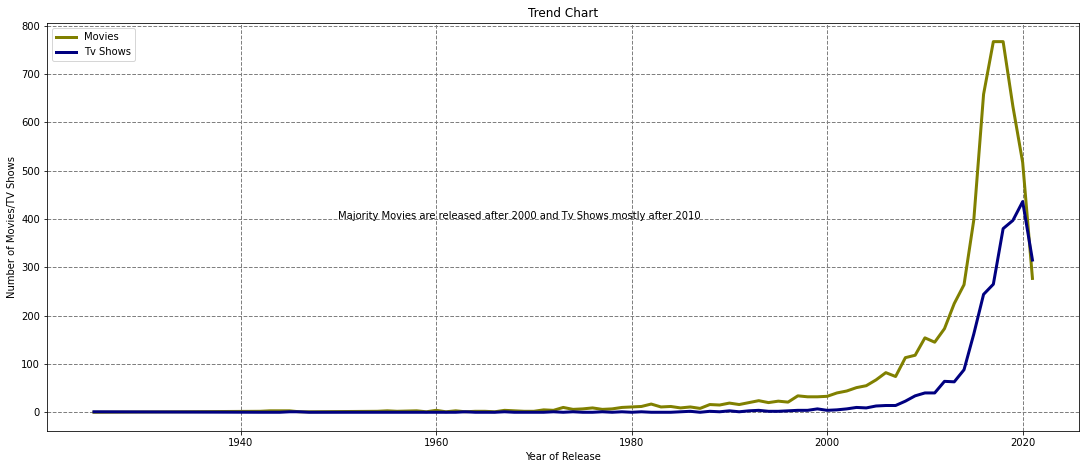

In [21]:
fig, ax = plt.subplots() 

# creating the visual:

ax.plot(n_data_pivot_table.release_year, n_data_pivot_table.Movie,label = 'Movies', color = 'olive', lw = '3')
ax.plot(n_data_pivot_table.release_year, n_data_pivot_table['TV Show'], label = 'Tv Shows', color = 'navy', lw = '3')

ax.set_ylabel('Number of Movies/TV Shows') 
ax.set_xlabel('Year of Release')
ax.set_title("Trend Chart")

plt.text(x=1950, y=400, s=r'Majority Movies are released after 2000 and Tv Shows mostly after 2010')

fig.set_size_inches(18.5, 7.5)
plt.grid(linestyle = '--', color = 'grey', lw = 1)
ax.legend()
plt.show()

## Bar Chart

In [22]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [23]:
# filter the df just for the information about movies

df_country = df[df['type']=='Movie']

print(df.shape[0])
print(df_country.shape[0])

8807
6131


In [24]:
df_country=df_country.groupby('country')['show_id'].agg(nr_movies = 'count').nlargest(15,'nr_movies')
df_country

,nr_movies
country,
United States,2058
India,893
United Kingdom,206
Canada,122
Spain,97
Egypt,92
Nigeria,86
Indonesia,77
Japan,76


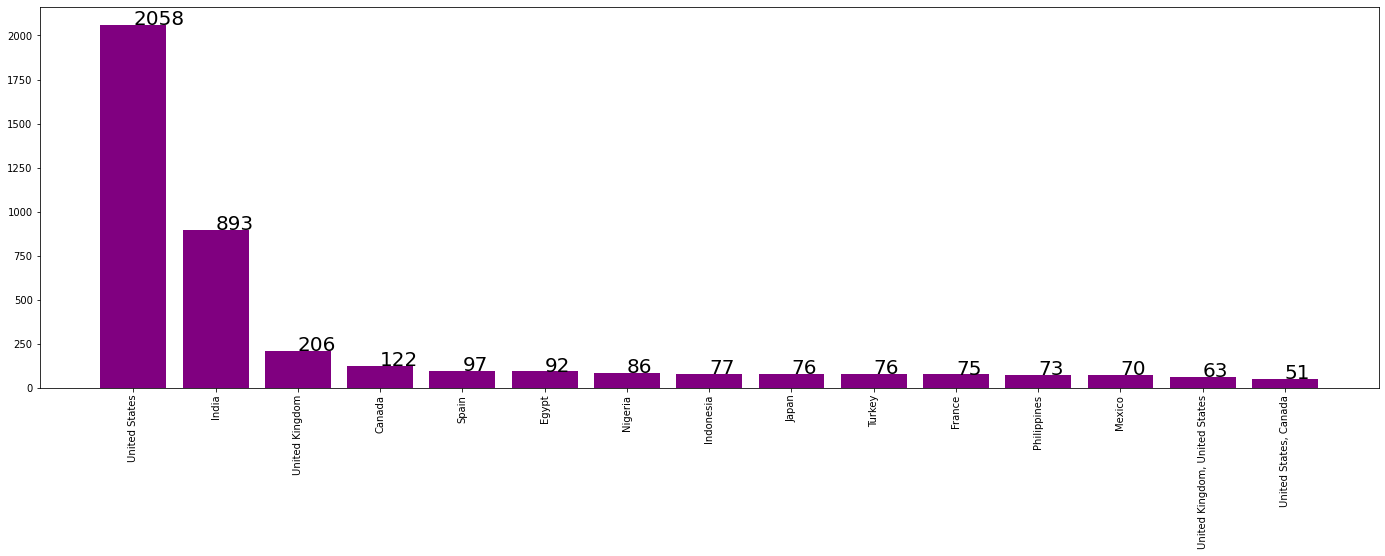

In [25]:
# the first bar chart

fig,ax = plt.subplots(figsize =(24,7))
ax.bar(df_country.index, df_country.nr_movies, color = 'purple')

for index, count in enumerate(df_country.nr_movies):
  plt.text(x = index, y = count, s = f"{count}",fontdict=dict(fontsize=20))


# setting the rotation of our x-labels
ax.set_xticklabels(df_country.index, rotation = 90)

plt.show()

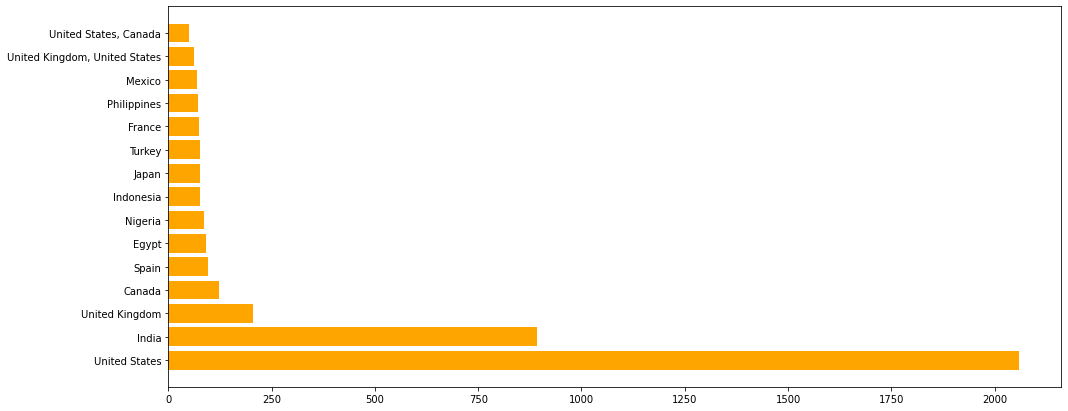

In [26]:
# created a hor bar chart
fig, ax = plt.subplots(figsize = (16,7))
ax.barh(df_country.index, df_country.nr_movies, color = 'orange')
plt.show()

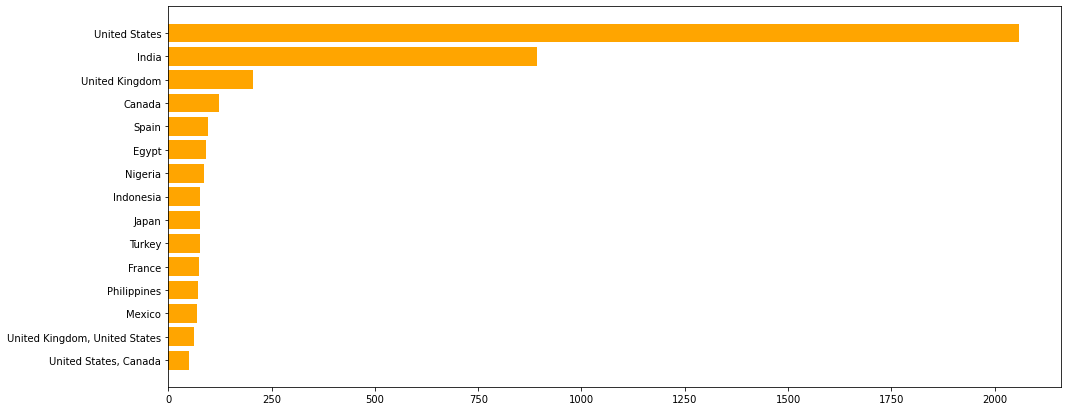

In [27]:
# horisontal bar charts

# created a hor bar chart
fig, ax = plt.subplots(figsize = (16,7))
ax.barh(df_country.index, df_country.nr_movies, color = 'orange')
# inverting the y-axis
ax.invert_yaxis()


plt.show()

In [28]:
## Stacked Bar Charts


n_data_pivot_table.head(5)

type,release_year,Movie,TV Show
0,1925,0.0,1.0
1,1942,2.0,0.0
2,1943,3.0,0.0
3,1944,3.0,0.0
4,1945,3.0,1.0


In [29]:
df_data = n_data_pivot_table[n_data_pivot_table['release_year']>2010]
df_data.head()

type,release_year,Movie,TV Show
63,2011,145.0,40.0
64,2012,173.0,64.0
65,2013,225.0,63.0
66,2014,264.0,88.0
67,2015,398.0,162.0


In [30]:
df_data = df_data.rename({'release_year':'Year', 'TV Show': 'TVshow'}, axis=1)
df_data

type,Year,Movie,TVshow
63,2011,145.0,40.0
64,2012,173.0,64.0
65,2013,225.0,63.0
66,2014,264.0,88.0
67,2015,398.0,162.0
68,2016,658.0,244.0
69,2017,767.0,265.0
70,2018,767.0,380.0
71,2019,633.0,397.0
72,2020,517.0,436.0


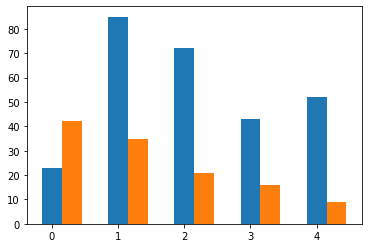

In [31]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

data1 = [23,85, 72, 43, 52]
data2 = [42, 35, 21, 16, 9]
width =0.3
plt.bar(np.arange(len(data1)), data1, width=width)
plt.bar(np.arange(len(data2))+ width, data2, width=width)
plt.show()

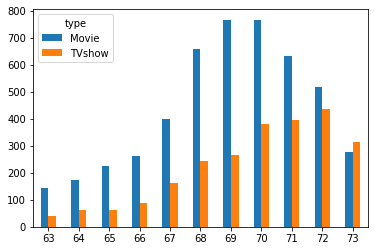

In [32]:


ax = df_data[['Movie','TVshow']].plot.bar(rot=0)


plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
n_data.head(2)

,release_year,type,show_id
0,1925,TV Show,1
1,1942,Movie,2


In [35]:


new_df = n_data[n_data['release_year']>2010]
new_df.head(3)

,release_year,type,show_id
97,2011,Movie,145
98,2011,TV Show,40
99,2012,Movie,173


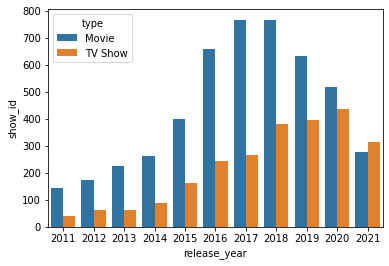

In [37]:
sns.barplot(x = 'release_year', y = 'show_id', hue = 'type', data = new_df)
plt.show()